This is solving MNist using a CNN - added as a direct comparison with MNist using a simple neural network (See MNist.ipynb)

The only difference between the two is that I add a series of convolutional layers. Everything else is exactly the same

In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plot
import numpy as np
import random

In [2]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

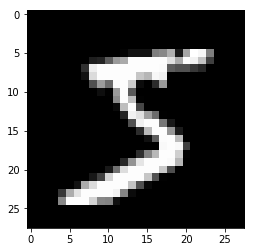

In [3]:
plot.imshow(x_train[0].reshape(28, 28), cmap='gray')
plot.show()

In [4]:
x_train.shape[1:]

(28, 28, 1)

Here, I add the convolutional layers. This is the same structure they used in their CIFAR-10 example (CIFAR-10 is a training set of images in ten categories including dogs, cats, cars, boats etc)

In [39]:
model = Sequential()
model.add(Conv2D(32, 3, input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

In [40]:
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
             metrics=["accuracy"])

In [41]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.3813 - acc: 0.9443
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0563 - acc: 0.9827
Epoch 3/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0378 - acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0273 - acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0261 - acc: 0.9921
Epoch 6/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0199 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0190 - acc: 0.9942
Epoch 8/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0179 - acc: 0.9949
Epoch 9/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0151 - acc: 0.9959
Epoch 10/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0136 - acc: 0.996

In [42]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 408us/step


[0.074895096133905006, 0.98550000000000004]

Prediction:  1
--------------


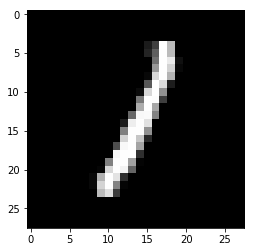

In [31]:
random_mnist_character = random.choice(x_train)
result = np.argmax(model.predict(np.array([random_mnist_character])))
print("Prediction: ", result)
print("--------------")

plot.imshow(random_mnist_character.reshape(28,28), cmap='gray')
plot.show()